In [88]:
%load_ext autoreload
%autoreload 2
import wandb

from wandb_utils import *

api = wandb.Api()

project = 'romeu/NeRF2D'

sweep = api.sweep(f'{project}/n01pj3hs')
sweep_runs = [api.run(f'{project}/{run.id}') for run in sweep.runs]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
runs = [RunWrapper(run) for run in sweep.runs]
runs[0].run.config

{'lr': 0.0001,
 't_far': 7,
 't_near': 1.5,
 'n_steps': 100,
 'd_hidden': 128,
 'n_layers': 6,
 'batch_size': 1000,
 'n_gt_poses': 100,
 'depth_sigma': 0.1,
 'n_freqs_dir': 5,
 'n_freqs_pos': 8,
 'camera_subset': False,
 'data.artifact': 'cube:latest',
 '+view_sparsity': 'all_views',
 'camera_subset_n': 5,
 'depth_loss_weight': 0.25,
 'use_depth_supervision': True,
 'model.use_depth_supervision': True}

In [134]:
runs_cube_depth = [run for run in runs if run.run.config['data.artifact'] == 'cube_convex:latest'
                   and run.run.config['model.use_depth_supervision'] == True
                   and run.run.config['camera_subset'] == True
                   and run.run.state == 'finished']

runs_cube_depth = sorted(runs_cube_depth, key=lambda r: r.run.config['camera_subset_n'])

runs_cube_depth[0].run.name

'olive-sweep-5'

100%|██████████| 1/1 [00:00<00:00, 1450.31it/s]


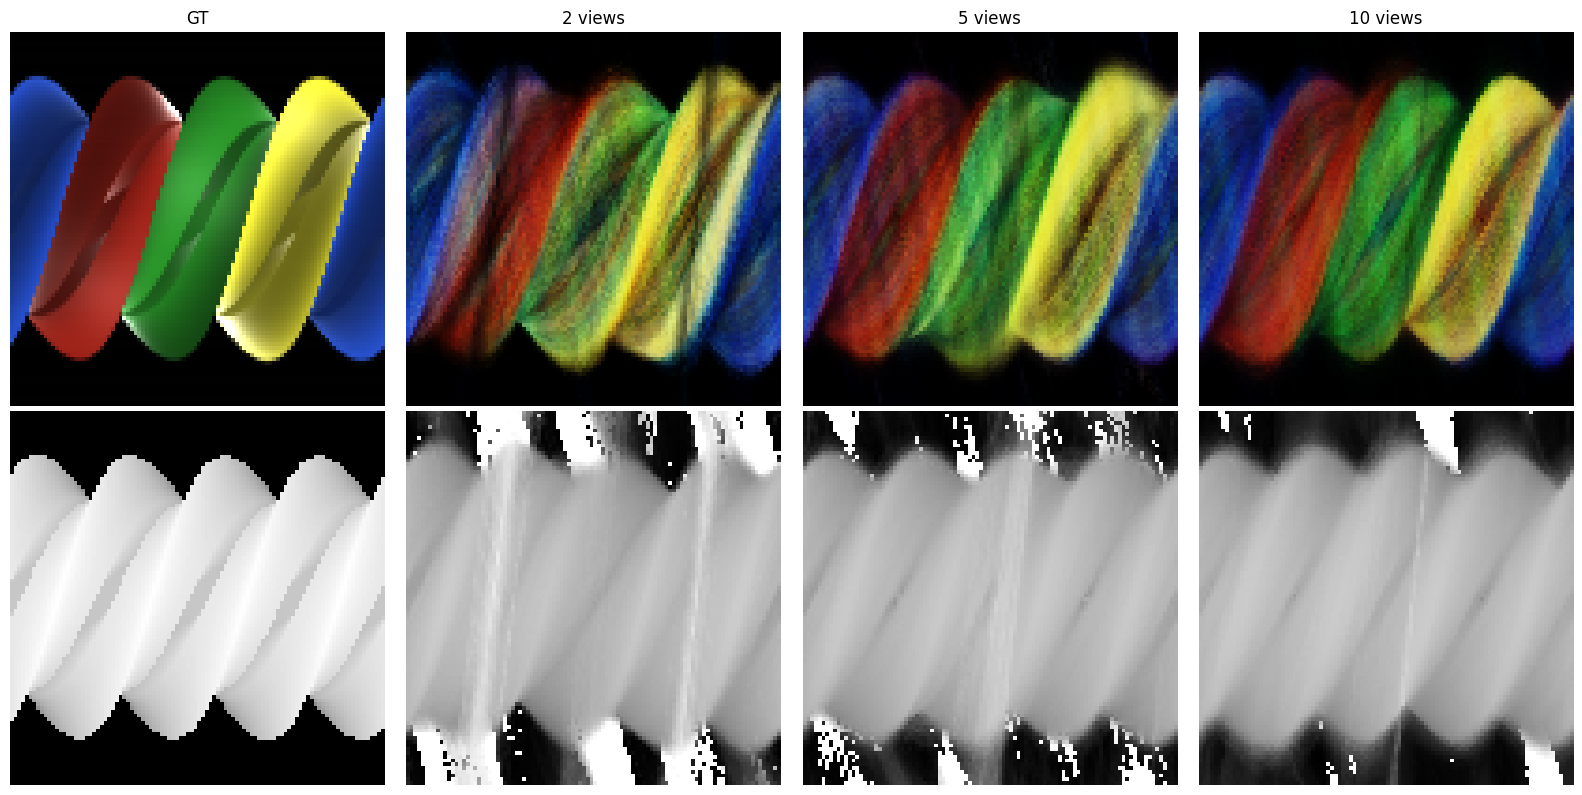

In [135]:
from visualizations.figures import compare_runs

manager = RunDataManager(Path('../run_data'))

compare_runs(
    runs_cube_depth,
    manager,
    with_gt=True,
    with_depth=True,
    with_density=False,
    show_psnr=False,
    title_fun=lambda r: f'{r.run.config['camera_subset_n']} views'
)